In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification

from pymatch import MLP, DataLoader
from pymatch.optimizer import sgd
from pymatch.functions import maxMarginLoss, crossentropyLoss

In [12]:
# Set Parameters
epochs = 30
lr = 0.1
momentum = 0.1
lrSchedulerStep = 10
batchSize = 4
num_classes = 2

# Create model
hiddenLayers = [8,8,1]
m = MLP(2, hiddenLayers)
criterion = maxMarginLoss

print(m)

MLP:
fcn        (in_c = 2, out_c = 8, act = relu
fcn        (in_c = 8, out_c = 8, act = relu
fcn        (in_c = 8, out_c = 1, act = identity



In [9]:
# # Generate data
X, Y = make_circles(n_samples=300, noise=0.01)
#X, Y = make_blobs(n_samples=300, centers=num_classes, n_features=2)
#X, Y = make_moons(n_samples=300, noise=0.1)

X_train, Y_train = X[0:200], Y[0:200]
X_test, Y_test = X[200:300], Y[200:300]

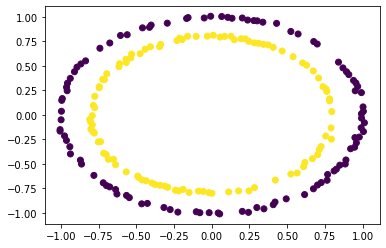

In [10]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train)

In [11]:
# Create Data Loader
dl = DataLoader(X_train, Y_train, batchSize=batchSize, shuffle=True)

In [13]:
# Train
print('Train for {} epochs.'.format(epochs))

for epoch in range(epochs):
    if (epoch+1) % lrSchedulerStep == 0:
        lr *= 0.5

    running_loss = 0
    running_correct = 0

    for batch in dl:
        loss = 0
        for (x, y) in batch:
            y = [2*y-1]

            pred = m(x)
            if (pred[0] >= 0 and y[0] >= 0) or (pred[0] < 0 and y[0] < 0):
                running_correct += 1
                
            loss = loss + criterion(pred, y, m, l1=False)
        loss = loss * (1/len(batch))

        loss.zero_grad()
        loss.backward()
        sgd(loss, lr, momentum=momentum)
        running_loss += loss
        
    print('Epoch: {}, Loss = {}, Acc = {}'.format(epoch, running_loss.val/len(dl), running_correct/len(dl)))

Train for 30 epochs.
Epoch: 0, Loss = 0.2510034616139112, Acc = 0.5
Epoch: 1, Loss = 0.22422167205862462, Acc = 0.58
Epoch: 2, Loss = 0.22119935340667254, Acc = 0.565
Epoch: 3, Loss = 0.20134985801187885, Acc = 0.6
Epoch: 4, Loss = 0.20311128615277207, Acc = 0.58
Epoch: 5, Loss = 0.20318258283249885, Acc = 0.605
Epoch: 6, Loss = 0.17778177665974032, Acc = 0.66
Epoch: 7, Loss = 0.2037347826351795, Acc = 0.635
Epoch: 8, Loss = 0.1670931676773514, Acc = 0.69
Epoch: 9, Loss = 0.10296270775345279, Acc = 0.855
Epoch: 10, Loss = 0.06730593678075775, Acc = 0.91
Epoch: 11, Loss = 0.036409056823967986, Acc = 0.965
Epoch: 12, Loss = 0.016199638217838114, Acc = 0.96
Epoch: 13, Loss = 0.007861830103447303, Acc = 0.96
Epoch: 14, Loss = -0.004878341915554596, Acc = 0.98
Epoch: 15, Loss = -0.003582489742061286, Acc = 0.97
Epoch: 16, Loss = 0.014212524387440764, Acc = 0.965
Epoch: 17, Loss = -0.008284595884654364, Acc = 0.98
Epoch: 18, Loss = 5.436878651816555e-05, Acc = 0.975
Epoch: 19, Loss = -0.0013

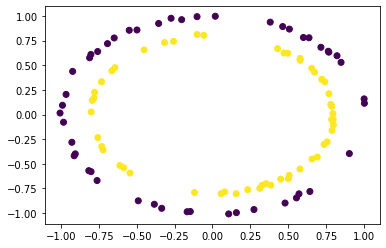

In [14]:
# Test
Y_pred = np.array([(m(x)[0].val > 0)*1.0 for x in X_test])

plt.scatter(X_test[:,0], X_test[:,1], c=Y_pred)

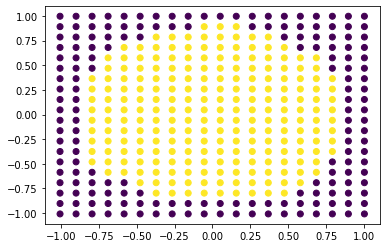

In [15]:
x_min_0 = np.min(X_test[:,0])
x_max_0 = np.max(X_test[:,0])
x_min_1 = np.min(X_test[:,1])
x_max_1 = np.max(X_test[:,1])

X_grid = []
for y in np.linspace(x_min_1, x_max_1, 20):
    X_grid += [[x, y] for x in np.linspace(x_min_0, x_max_0, 20)]
X_grid = np.array(X_grid)

Y_grid = np.array([(m(x)[0].val > 0)*1.0 for x in X_grid])

plt.scatter(X_grid[:,0], X_grid[:,1], c=Y_grid)